# Spam/Ham Email Classifcation 

This project is a basic classifier that will be able to distinguish spam (junk/commercial/bulk) emails from ham (non-spam) emails. 

Showcase of 
- Feature engineering with text data
- Using sklearn libraries to process data and fit models
- Validating the performance of your model and minimizing overfitting
- Generating and analyzing precision-recall curves

I am using a real world dataset to test and create my models. The training dataset consists of 8348 email messages and their labels (0: ham, 1: spam). The test dataset contains 1000 unlabeled email examples. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### Load in the Data


In [103]:
original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [104]:
#Convert the emails to lower case to process the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [6]:
test.head()

,id,subject,email
0,0,Subject: CERT Advisory CA-2002-21 Vulnerabilit...,\n \n -----begin pgp signed message-----\n \n ...
1,1,Subject: ADV: Affordable Life Insurance ddbfk\n,low-cost term-life insurance!\n save up to 70%...
2,2,Subject: CAREER OPPORTUNITY. WORK FROM HOME\n,------=_nextpart_000_00a0_03e30a1a.b1804b54\n ...
3,3,Subject: Marriage makes both sexes happy\n,"url: http://www.newsisfree.com/click/-3,848315..."
4,4,Subject: Re: [SAtalk] SA very slow (hangs?) on...,on thursday 29 august 2002 16:39 cet mike burg...


In [105]:
#Check for missing values 
display(original_training_data.isna().sum(), test.isna().sum())

id         0
subject    6
email      0
spam       0
dtype: int64

id         0
subject    1
email      0
dtype: int64

In [106]:
#Replace missing values with empty strings 
original_training_data['subject'] = original_training_data['subject'].fillna("")
test['subject'] = test['subject'].fillna("")
original_training_data['spam'] = original_training_data['spam'].fillna(0)

### Training Validation Split

We need to split the training data into separate training and validation datasets. The validation data to assess the performance of your classifier once you are finished training is necessary. 

In [108]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1)

## Feature Engineering
Because I want to use the text of an email to predict whether the email is ham or spam, I need to use logistic regression to train a classifier. I first need to create a numeric feature matrix $X$ and a vector of corresponding binary labels $y$. In order to do this, I can create numeric features derived from the email text and use those features for logistic regression. 

Each row of $X$ is an email. Each column for $X$ contains one feature for all the emails. 

Function `words_in_texts`
Input: list of `words`, pandas Series of email `texts`
Output: 2-D NumPy array containing one row for each small text
The row contains either 0 or 1 for each word in the list; 0 if doesn't appear in the text, 1 if the word does.

Example:
```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

In [109]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = []
    for i in texts:
        arr_0 = []
        for j in words:
            arr_0.append(j in i)
        indicator_array.append(arr_0)
    indicator_array = np.array(indicator_array).astype(int)
    return indicator_array

## Exploratory Data Analysis

I first need to identify features that would allow us to distinguis spam emails from ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.

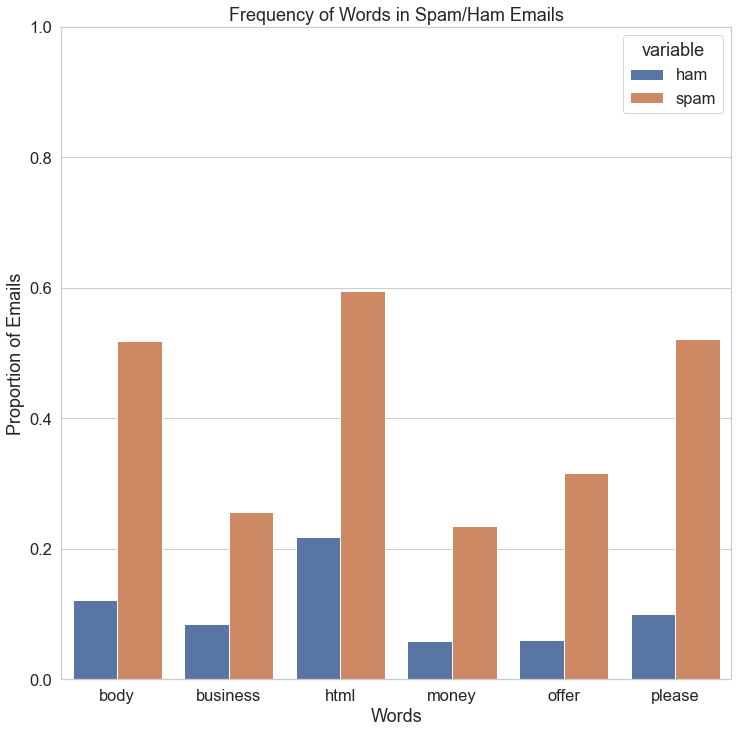

In [110]:
#Bar chart compares the proportion of emails in each class containing a particular set of words

#function to determine proportion of spam/ham emails containing specific words
def get_prop(words, data):
    containing = words_in_texts(word_list, data)
    sum_arr = []
    for i in np.arange(len(words)):
        count = 0
        for j in containing:
                count = count + j[i]
        sum_arr.append(count)
    return np.array(sum_arr) / len(data)


word_list = ['body', 'business', 'html', 'money', 'offer', 'please']

#separate spam and ham emails 
hamz = train[train['spam'] == 0]
hamz_arr = get_prop(word_list, hamz['email'])

spamz = train[train['spam'] == 1]
spamz_arr = get_prop(word_list, spamz['email']) 

grapho = pd.DataFrame()
grapho['word_list'] = word_list
grapho['ham'] = hamz_arr
grapho['spam'] = spamz_arr
grapho = pd.melt(grapho, id_vars = 'word_list')
plt.figure(figsize = (12,12))
plt.ylim(0,1)
sns.barplot(x = 'word_list', y = 'value', hue = 'variable', data = grapho)
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title('Frequency of Words in Spam/Ham Emails');


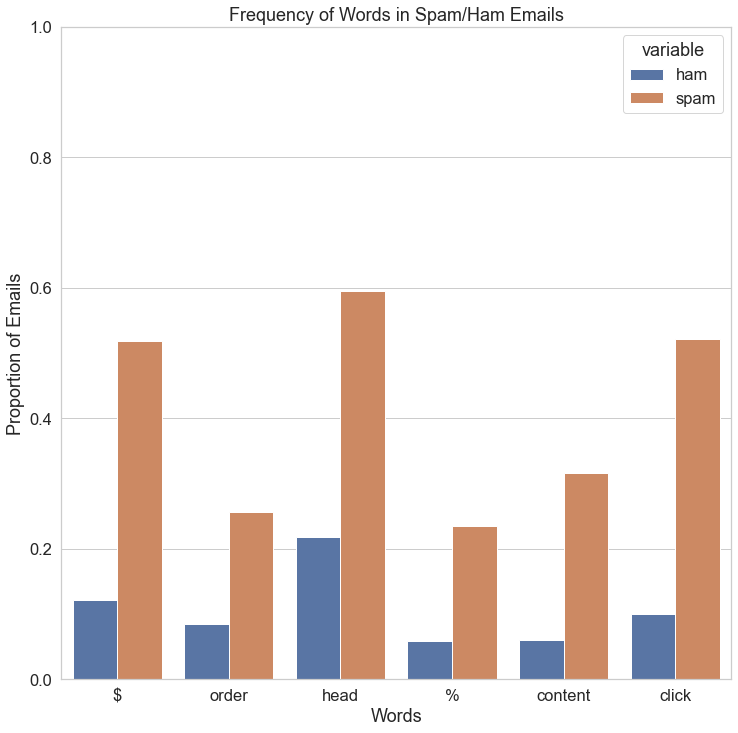

In [111]:

word_list = ['$', 'order', 'head', '%', 'content', 'click']

grapho = pd.DataFrame()
grapho['word_list'] = word_list
grapho['ham'] = hamz_arr
grapho['spam'] = spamz_arr
grapho = pd.melt(grapho, id_vars = 'word_list')
plt.figure(figsize = (12,12))
plt.ylim(0,1)
sns.barplot(x = 'word_list', y = 'value', hue = 'variable', data = grapho)
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title('Frequency of Words in Spam/Ham Emails');



Want to create a class conditional density plot comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set. 

<ipython-input-112-ab7945b88286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamz['email_length'] = hamz['email'].apply(len)
<ipython-input-112-ab7945b88286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spamz['email_length'] = spamz['email'].apply(len)
/Users/kianatran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level funct

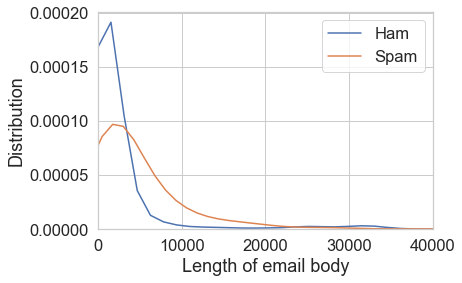

In [112]:
hamz['email_length'] = hamz['email'].apply(len)
spamz['email_length'] = spamz['email'].apply(len)
plt.xlim(0, 40000)
sns.distplot(hamz['email_length'], bins = 10000, hist = False, label = 'Ham')
sns.distplot(spamz['email_length'], bins = 10000, hist = False, label = 'Spam')
plt.xlabel('Length of email body')
plt.ylabel('Distribution')
plt.legend();

## Basic Classification

Because function `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email, we can use it directly to train a classifier. 

`X_train`: matrix of 0s and 1s created by using `words_in_texts` function on all emails in the training set

`Y_train`: vector of correct lables for each email in the training set

In [113]:
#words to help distinguish spam/ham emails
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = train['spam']

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 5239    0
 4008    0
 343     1
 4800    0
 6148    0
 Name: spam, dtype: int64)

Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`. Then, outputting the accuracy of the model (on the training data). 

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_train)
training_accuracy = sum((Y_train == y_pred).astype(int)) / len(Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7572208172500998


## Evaluating Classifiers

The simple classifier isn't bad, but not as good as it might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure. Accuracy on the training set doesn't always translate to accuracy in the real world (on the test set). 

Let's look at the two kinds of **filtering** errors our classifier can make. 
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

For clarity, spam emails are labelled 1 while ham emails are labelled 0.

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of actually spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

In [115]:
#Compare if have a `zero_predictor` classifier that always predicts 0 (never predicts positive)
zero_predictor_fp = 0
zero_predictor_fn = np.sum((Y_train == 1).astype(int))
zero_predictor_acc = np.sum((Y_train == 0).astype(int))/len(Y_train)
zero_predictor_recall = 0 

In [116]:
def to_int(x):
    try:
        return int(x)
    except ValueError:
        return 0

Y_train = [*map(to_int, Y_train)]

In [117]:
#Compare to simple classifier created above.
tp_log = 0
fp_log = 0
tn_log = 0
fn_log = 0
for i in np.arange(len(y_pred)):
    if y_pred[i] == Y_train[i] and y_pred[i] == 1:
        tp_log = tp_log + 1
    elif y_pred[i] == 1 and Y_train[i] != y_pred[i]:
        fp_log = fp_log + 1
    elif y_pred[i] == 0 and Y_train[i] == y_pred[i]:
        tn_log = tn_log + 1
    elif y_pred[i] == 0 and Y_train[i] != y_pred[i]:
        fn_log = fn_log + 1

logistic_predictor_precision = tp_log/ (tp_log + fp_log)
logistic_predictor_recall = tp_log / (tp_log + fn_log)
logistic_predictor_far = fp_log / (fp_log + tn_log)
logistic_predictor_acc = (tp_log + tn_log) / len(y_pred)

In [97]:
import sys
!{sys.executable} -m pip install tabulate

In [98]:
from tabulate import tabulate

In [118]:
table = [['','Zero Predictor','Basic Log Classifier'],['Precision', 0, logistic_predictor_precision],['Recall',0, logistic_predictor_recall],['False Alarm Rate',0,logistic_predictor_far],['Accuracy', zero_predictor_acc, logistic_predictor_acc]]
print(tabulate(table, headers = 'firstrow',tablefmt='fancy_grid'))

╒══════════════════╤══════════════════╤════════════════════════╕
│                  │   Zero Predictor │   Basic Log Classifier │
╞══════════════════╪══════════════════╪════════════════════════╡
│ Precision        │         0        │              0.625     │
├──────────────────┼──────────────────┼────────────────────────┤
│ Recall           │         0        │              0.112565  │
├──────────────────┼──────────────────┼────────────────────────┤
│ False Alarm Rate │         0        │              0.0230234 │
├──────────────────┼──────────────────┼────────────────────────┤
│ Accuracy         │         0.745774 │              0.757221  │
╘══════════════════╧══════════════════╧════════════════════════╛


The accuracy of the basic logistic regression model does not preform much better than the zero prediction classifier, but at least the logistic model can identify any relevant elements. 

## Improving the Model

In order to improve my model, I added several variables to perform linear regression:
1. Character and word counts for the subject line
2. Character and word counts for the email text
3. Increase use of feature words and include symbols (ex. $, !, %)


In [119]:
def word_count(s):
    return len(s.split())

train_new = train.copy()
train_new['sub count'] = train_new['subject'].str.len()
train_new['subject'] = train_new['subject'].str.lower()
word_list_new = ['html', 'please', 'click', 'order', 'price', 'mime', 'http', 'mailing list','dear','urgent','font','bgcolor','sir', 'head','$']
subject_list = ['$', 'free', 'you','low', 'invited','re','@','rate','your','mortgage','business', 'earn','off','!!','!']
train_new['word count'] = train_new['email'].agg(word_count)



X_train_new = words_in_texts(word_list_new, train_new['email'])
X_train_new = np.append(X_train_new, words_in_texts(subject_list, train_new['subject']), axis = 1)
X_train_new = np.append(X_train_new, train_new['sub count'].to_numpy().reshape(len(train_new['sub count']), 1), axis = 1)
X_train_new = np.append(X_train_new, train_new['word count'].to_numpy().reshape(len(train_new['word count']), 1), axis = 1)
Y_train_new = train_new['spam']


model_new = LogisticRegression()
model_new.fit(X_train_new, Y_train_new)
y_pred_new = model_new.predict(X_train_new)
training_accuracy_new = sum((Y_train_new == y_pred_new).astype(int)) / len(Y_train_new)
print("Training Accuracy: ", training_accuracy_new)


Training Accuracy:  0.8975109809663251


/Users/kianatran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ROC Curve

When making predictions with a logistic model, your model gives a probability that your data point is a specific classication. With this spam/ham classification example, say that an email is spam if it gives a $\ge 0.5$ probability of being spam. However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam, for example. 

An ROC curve represents this trade off between false positives and false negatives.

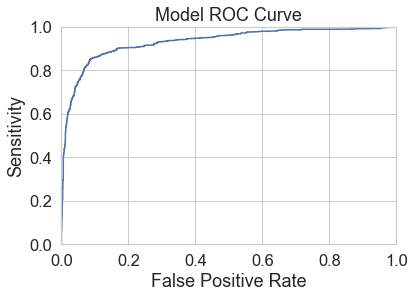

In [120]:
from sklearn.metrics import roc_curve

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

words_list_model_probabilities = model_new.predict_proba(X_train_new)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = roc_curve(Y_train_new, words_list_model_probabilities, pos_label=1)
import matplotlib.pyplot as plt
plt.title('Model ROC Curve')
plt.plot(false_positive_rate_values, sensitivity_values)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('False Positive Rate')
plt.show()
